# <span style="color:Purple"> Numerical Simulation Laboratory : Exercise 8 </span>

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.

### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need (analytically):</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331761027
2nd excited state energy:  1.971733134393021


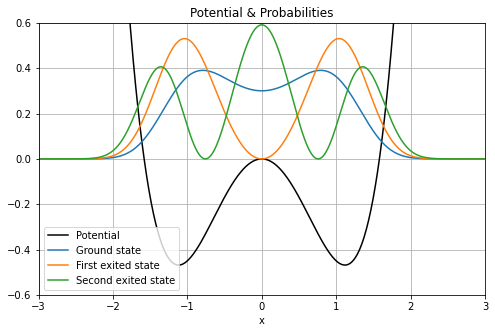

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2 , label = "Ground state")
plt.plot(x,(psi[1])**2 , label = "First exited state")
plt.plot(x,(psi[2])**2 , label = "Second exited state")
plt.legend(loc="best")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

# Esercizio 8.1 & 8.2 - <span style="color:deeppink"> Variational MC </span>

In [2]:
import math
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

In [3]:
mu , sigma = np.loadtxt( "Parameters.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
energy , error_ene = np.loadtxt( "data.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
Z = np.loadtxt( "Energies.csv" , dtype=float , usecols=(0) , unpack= True ) #energie stimate con i diversi parametri

In [12]:
mu_min = mu[np.argmin(Z)] 
sigma_min = sigma[np.argmin(Z)]
print ("I parametri che minimizzano l'energia sono: mu = " + str(mu_min) + " , sigma = " + str(sigma_min) )
print("La stima dell'energia calcolata con questi parametri è " , energy[-1] )

I parametri che minimizzano l'energia sono: mu = 0.808527 , sigma = 0.614061
La stima dell'energia calcolata con questi parametri è  -0.44408


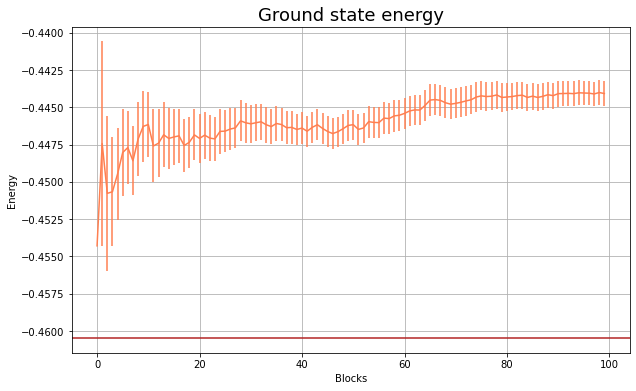

In [5]:
plt.figure(figsize=(10,6))
plt.errorbar( np.arange(len(energy)) , energy , yerr=error_ene , color='coral' )
plt.axhline(E[0], label='analytical', color='firebrick')
plt.title("Ground state energy" , fontsize= 18)
plt.xlabel("Blocks")
plt.ylabel("Energy")
plt.grid()

Il grafico raffigura l'andamento dell'energia del ground state in funzione del numero di blocchi. In totale, i campionamenti della funzione d'onda eseguiti per stimare l'energia sono $10^6$, che sono stati suddivisi in 100 blocchi. Ogni blocco contiene quindi 10000 misure. Nel campionare $|\psi (x)|^2$, ho scelto il punto di partenza generandolo in modo stocastico nell'intervallo ( -0.5 , 0.5 ). 
L'energia risulta superiore al valore atteso calcolato analiticamente, cosa che effettivamente mi aspetto da una stima che si basa su un metodo variazionale, che quindi pone solamente un limite dall'alto all'energia del ground state.
In particolare il plot mostra l'energia media per i parametri fittati. La stima finale dell'energia è di -0.4441.

In [6]:
#Carico i dati per l'istogramma che mostra il campionamento della funzione d'onda
my_psi = np.loadtxt( "psi.csv" , dtype=float , usecols=(0) , unpack= True)

In [7]:
#Definisco la funzione d'onda attesa, che valuterò con i parametri migliori
def psi_exact(x , mu , sigma ):
    return (np.exp(-(x-mu)**2/(2*sigma**2)) + np.exp(-(x+mu)**2/(2*sigma**2)))/(2*sigma*np.sqrt(2*np.pi))

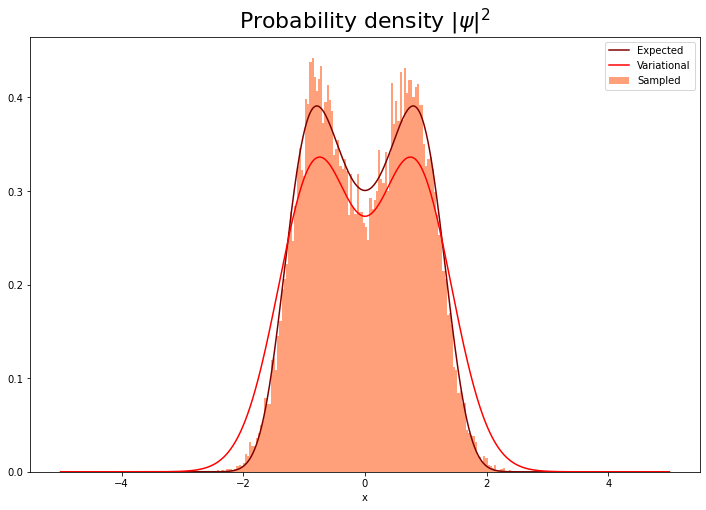

In [8]:
fig , ax = plt.subplots(1, 1 , figsize=(12,8)) 
ax.hist( my_psi, bins=150 , density=True, label='Sampled' , color= "lightsalmon" , lw=0)
ax.plot(x, (psi[0])**2 , label = "Expected" , color= "maroon")
ax.plot( x , psi_exact(x , mu_min , sigma_min ) , label = "Variational" , color = "red" )
ax.set_title(r"Probability density $|\psi|^2$" , fontsize = 22)
ax.set_xlabel("x")
ax.legend(loc="best")

Il grafico mostra la densità di probabilità calcolata in 3 diverse maniere. La curva di colore più scuro è quella ottenuta analiticamente. La curva arancione invece è la funzione d'onda di ground state fornita da un modello approssimato $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2} {2\sigma^2}} $ e valutata con i parametri $\mu$ e $\sigma$ migliori estratti dall'algoritmo. 
Il fatto che la forma della funzione d'onda sia solo un'assunzione, spiega le differenze rispetto a quella analitica, nonostante ciò l'accordo tra le due è abbastanza buono. L'istogramma invece deriva invece dal campionamento diretto di $|\psi|^2$, che è stato eseguito con $10^5$ punti. Il fatto che l'istogramma riflette la densità di probabilità è indice del buon funzionamento dell'algoritmo. 

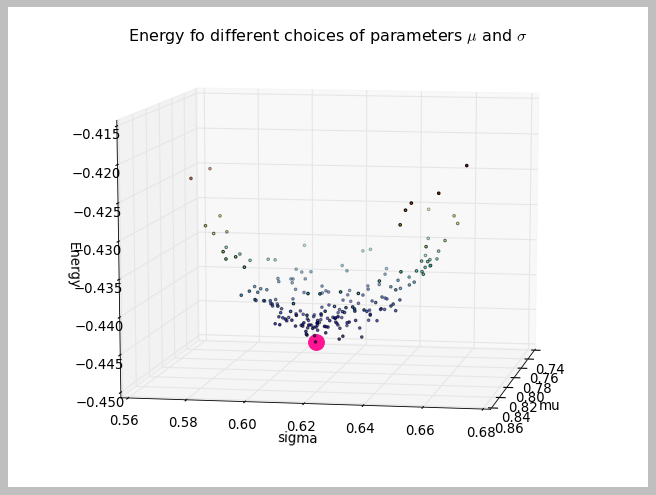

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mu, sigma, Z, c=Z, marker='.')
ax.scatter( mu_min , sigma_min , Z[np.argmin(Z)] , color = "deeppink" , marker = "o" , s=200  )
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('Energy')
ax.set_title( r'Energy fo different choices of parameters $\mu$ and $\sigma$' )
ax.view_init(10, 10)
plt.style.use("classic")
plt.show()

Il grafico riporta i valori dell'energia del ground state, calcolati per diverse scelte di parametri $\mu$ e $\sigma$. Il punto evidenziato in rosa ha le coordinate dei migliori parametri per il nostro sistema.  È evidente che ci troviamo nell'intorno di un minimo dell'energia, la scelta dell'intervallo in cui cercare i parametri è quindi adatta. In particolare il mio codice cerca la $\sigma$ migliore nell'intervallo $(0.55 , 0.68)$ e il miglior valor medio nel range $(0.75 , 0.85)$.